In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

plt.rcParams['savefig.bbox'] = 'tight'  # 保存图片时布局紧凑

def show_image(images, title=None):
    """
    显示图片
    """
    if not isinstance(images, list):
        images = [images]
    # figure 表示整个图形，axes 表示包含每个子图坐标轴的数组，squeeze=False 表示始终返回一个二维数组
    figure, axes = plt.subplots(ncols=len(images), squeeze=False)
    
    # 显示图片
    for i, image in enumerate(images):
        image = image.detach()
        image = F.to_pil_image(image)
        axes[0, i].imshow(np.asarray(image))
        axes[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    
    # 设置标题
    if title:
        figure.suptitle(title)

In [34]:
import torchvision.transforms.functional as F
import torchvision.transforms

def resize_and_center_crop(image, size=520):
    """
    调整图片大小并裁剪中心区域
    """
    image = F.resize(image, size)
    image = F.center_crop(image, size)
    return image

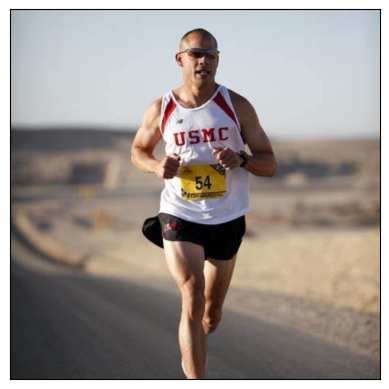

In [35]:
import os
from torchvision.utils import make_grid
from torchvision.io import read_image

# 读取图片
image_path = '../datas/_TutorialImages/KeyPoints'
display_images = []
for filename in os.listdir(image_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        path = os.path.join(image_path, filename)
        # 读取图片
        _image = read_image(path)
        # 调整图片大小并裁剪中心区域
        _image = resize_and_center_crop(_image)
        display_images.append(_image)

# 显示图片
grid_image = make_grid(display_images)
show_image(grid_image)

In [36]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights

# 加载预训练模型
weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT
model = keypointrcnn_resnet50_fpn(weights=weights, progress=False)
model.eval()

# 预处理图片
transform = weights.transforms()
batch = torch.stack([transform(image) for image in display_images])

# 推理
with torch.no_grad():
    outputs = model(batch)

In [37]:
import torch
import numpy as np

key_points = outputs[0]['keypoints']
scores = outputs[0]['scores']

detect_threshold = 0.75
index = torch.where(torch.gt(scores, detect_threshold))
key_points = key_points[index]

connect_skeleton = [
    (0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (6, 8),
    (7, 9), (8, 10), (5, 11), (6, 12), (11, 13), (12, 14), (13, 15), (14, 16)
]

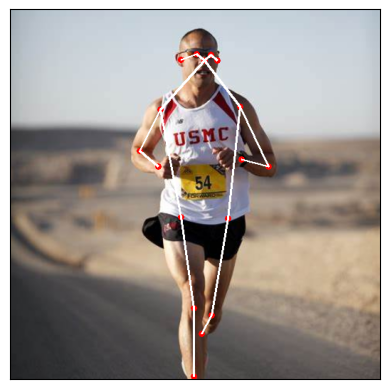

In [38]:
from torchvision.utils import draw_keypoints

result = [
    draw_keypoints(image, key_points, connectivity=connect_skeleton,
                   colors="red", radius=4, width=3)
    for image in display_images
]
show_image(result)